In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [2]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


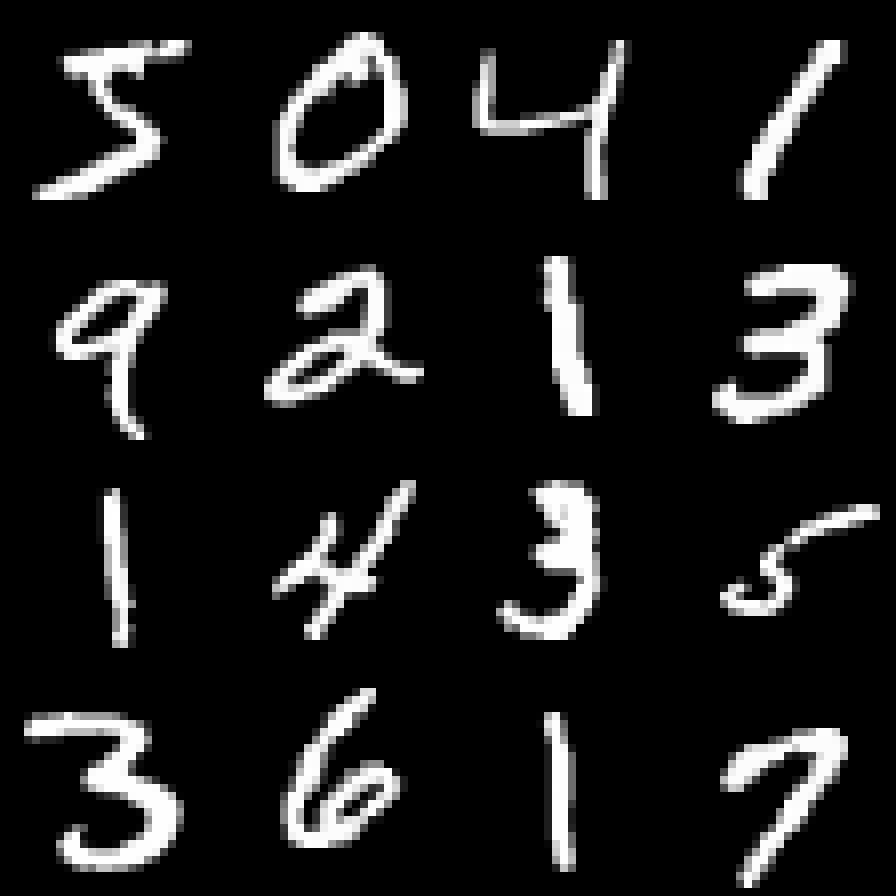

In [3]:
from IPython.display import Image
from PIL import Image
import numpy as np
a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [4]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train = x_train[:100]
y_train = y_train[:100]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


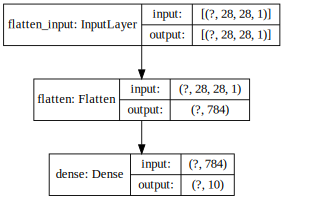

In [12]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [13]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [14]:
batch_size = 128
epochs = 20

In [15]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 3s 29ms/sample - loss: 2.5088 - accuracy: 0.0800 - val_loss: 2.4764 - val_accuracy: 0.0883
Epoch 2/20
100/100 [==============================] - 2s 16ms/sample - loss: 2.4343 - accuracy: 0.0900 - val_loss: 2.4304 - val_accuracy: 0.1049
Epoch 3/20
100/100 [==============================] - 2s 21ms/sample - loss: 2.3621 - accuracy: 0.1300 - val_loss: 2.3863 - val_accuracy: 0.1241
Epoch 4/20
100/100 [==============================] - 2s 22ms/sample - loss: 2.2922 - accuracy: 0.1400 - val_loss: 2.3443 - val_accuracy: 0.1412
Epoch 5/20
100/100 [==============================] - 2s 19ms/sample - loss: 2.2246 - accuracy: 0.2000 - val_loss: 2.3042 - val_accuracy: 0.1619
Epoch 6/20
100/100 [==============================] - 3s 28ms/sample - loss: 2.1592 - accuracy: 0.2100 - val_loss: 2.2659 - val_accuracy: 0.1827
Epoch 7/20
100/100 [==============================] - 2s 24ms/sample - loss: 2.096

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8558542446136475
Test accuracy: 0.4715


In [17]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
    'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.508754
1        1  Loss auf Trainingsdaten  2.434285
2        2  Loss auf Trainingsdaten  2.362117
3        3  Loss auf Trainingsdaten  2.292233
4        4  Loss auf Trainingsdaten  2.224611
5        5  Loss auf Trainingsdaten  2.159218
6        6  Loss auf Trainingsdaten  2.096015
7        7  Loss auf Trainingsdaten  2.034962
8        8  Loss auf Trainingsdaten  1.976013
9        9  Loss auf Trainingsdaten  1.919116
10      10  Loss auf Trainingsdaten  1.864209
11      11  Loss auf Trainingsdaten  1.811214
12      12  Loss auf Trainingsdaten  1.760044
13      13  Loss auf Trainingsdaten  1.710596
14      14  Loss auf Trainingsdaten  1.662767
15      15  Loss auf Trainingsdaten  1.616447
16      16  Loss auf Trainingsdaten  1.571537
17      17  Loss auf Trainingsdaten  1.527946
18      18  Loss auf Trainingsdaten  1.485600
19      19  Loss auf Trainingsdaten  1.444439
20       0       Loss auf Testdate

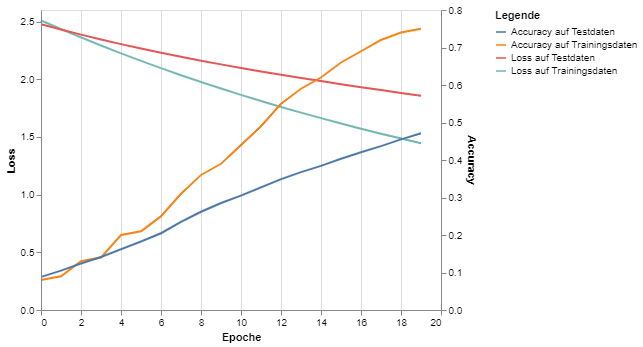

In [18]:
import altair as alt
alt.renderers.enable('notebook')

chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


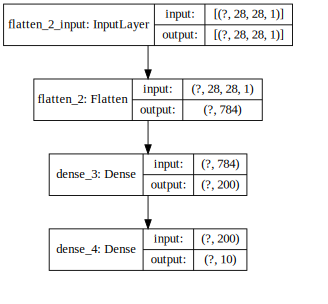

In [20]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [21]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 1s 7ms/sample - loss: 2.2089 - accuracy: 0.2000 - val_loss: 2.1682 - val_accuracy: 0.2434
Epoch 2/20
100/100 [==============================] - 1s 8ms/sample - loss: 1.9490 - accuracy: 0.4700 - val_loss: 2.0485 - val_accuracy: 0.3630
Epoch 3/20
100/100 [==============================] - 1s 6ms/sample - loss: 1.7316 - accuracy: 0.6600 - val_loss: 1.9474 - val_accuracy: 0.4203
Epoch 4/20
100/100 [==============================] - 1s 9ms/sample - loss: 1.5429 - accuracy: 0.7600 - val_loss: 1.8580 - val_accuracy: 0.4572
Epoch 5/20
100/100 [==============================] - 1s 9ms/sample - loss: 1.3778 - accuracy: 0.8200 - val_loss: 1.7741 - val_accuracy: 0.4909
Epoch 6/20
100/100 [==============================] - 1s 5ms/sample - loss: 1.2269 - accuracy: 0.8900 - val_loss: 1.6917 - val_accuracy: 0.5247
Epoch 7/20
100/100 [==============================] - 1s 9ms/sample - loss: 1.0861 - acc

In [22]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

Test loss: 1.1480867706298827
Test accuracy: 0.6599


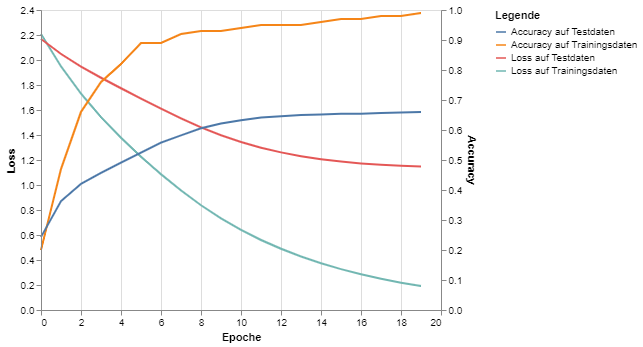

In [23]:
evaluate(model, history)

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


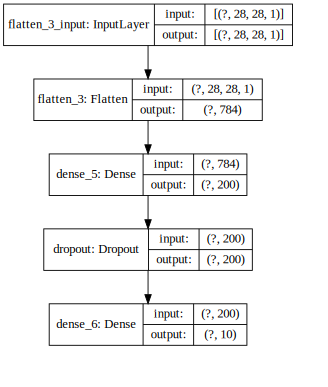

In [25]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [26]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4384 - accuracy: 0.8713 - val_loss: 0.1875 - val_accuracy: 0.9442
Epoch 2/12
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2208 - accuracy: 0.9359 - val_loss: 0.1347 - val_accuracy: 0.9593
Epoch 3/12
60000/60000 [==============================] - 11s 184us/sample - loss: 0.1737 - accuracy: 0.9489 - val_loss: 0.1093 - val_accuracy: 0.9667
Epoch 4/12
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1464 - accuracy: 0.9568 - val_loss: 0.0963 - val_accuracy: 0.9710
Epoch 5/12
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1289 - accuracy: 0.9612 - val_loss: 0.0886 - val_accuracy: 0.9737
Epoch 6/12
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1158 - accuracy: 0.9650 - val_loss: 0.0801 - val_accuracy: 0.9756
Epoch 7/12
60000/60000 [========================

Test loss: 0.06525687221253756
Test accuracy: 0.9794


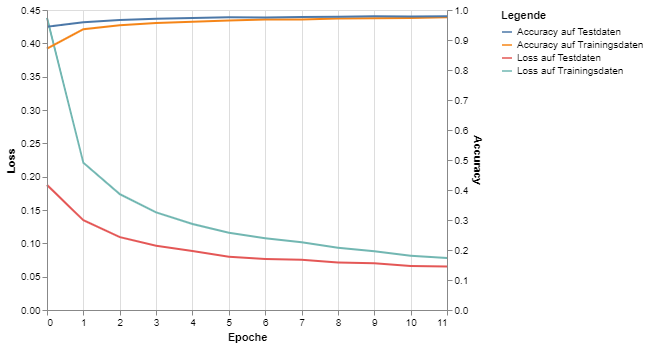

In [27]:
evaluate(model, history)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               1843400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)              

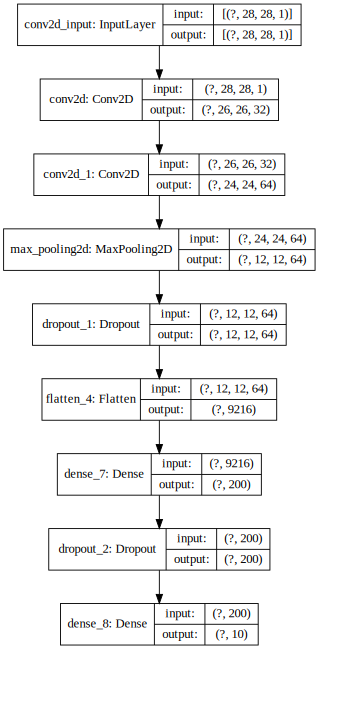

In [28]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

![Struktur des Convolutional Network](Convnet.svg)

In [ ]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

In [ ]:
evaluate(model, history)

Schöne 3D-Visualisierung eines Convolutional Networks für MNIST: http://scs.ryerson.ca/~aharley/vis/conv/